In [1]:
import sys
sys.path.append("D:\\python\\lib\\site-packages")
import  cv2
import matplotlib.pyplot as plt
import random
import os
import numpy as np
dir ="D:\\ChromeCoreDownloads\\BioID-FaceDatabase-V1.2"

## 数据

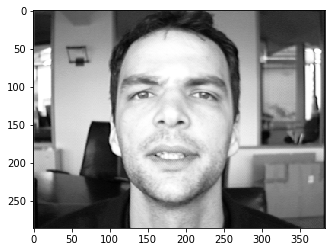

In [2]:
dataSet = os.listdir(dir)
img = cv2.imread(dir+"\\"+dataSet[23],cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='Greys_r')

![jupyter](./eye.png)

## 图片眼部对齐

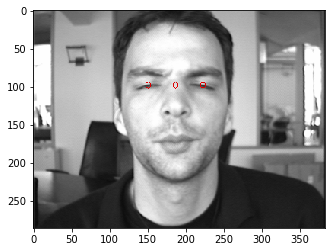

In [3]:
files = os.listdir(dir)
eye = files[8]
img = files[9]

eye = open(dir + "\\"+eye, "rb")
eye.readline()
l = str(eye.readline(), encoding='UTF-8')
xl,yl,xr,yr=int(l.split('\t')[0]),int(l.split('\t')[1]),int(l.split('\t')[2]),int(l.split('\t')[3][:3])
a_x=int((xl+xr)/2)
a_y=int((yl+yr)/2)

image = cv2.imread(dir+"\\"+img, cv2.IMREAD_COLOR)
image = cv2.circle(image,(xl,yl),4,222)
image = cv2.circle(image, (xr, yr),4,222)
image = cv2.circle(image,(a_x,a_y),4,222)

plt.imshow(image,cmap='Greys_r')


In [4]:
cv2.imwrite("1.jpg",image[a_y-40:a_y+100,a_x-70:a_x+70])  # 截取140*140的脸部图片

True

![jupyter](./1.jpg)

## 采样（训练集和测试集）

In [46]:
files = []
for file in os.listdir("D:\\ChromeCoreDownloads\\mydata"):
    files.append(file)
train = random.sample(files,int(len(files)*0.9))
test = set(files) - set(train)
print(len(train),len(test))
for i in train:
    os.system("copy "+"D:\\ChromeCoreDownloads\\mydata\\"+i+"  D:\\ChromeCoreDownloads\\train\\"+i)
for i in test:
    os.system("copy " + "D:\\ChromeCoreDownloads\\mydata\\" + i + "  D:\\ChromeCoreDownloads\\test\\" + i)

1353 151


## 平均脸

In [62]:
## 平均脸
num =0
img=np.zeros((140*140),dtype="int32")
for file in os.listdir("D:\\ChromeCoreDownloads\\train"):
    p=np.array(cv2.imread("D:\\ChromeCoreDownloads\\train\\"+file, cv2.IMREAD_GRAYSCALE))
    if p.flatten().shape == img.shape:
        img=np.add(img,p.flatten())
        num += 1
avg=[]
print(img)
for i in img:
    if not i:
        i=0
        avg.append(0)
        continue
    avg.append(int(i/int(num)))
img = avg
img = np.reshape(np.array(img),(140,140))
cv2.imwrite("average.jpg",img)

[195765 191503 187420 ... 127954 128717 129591]


True

![jupyter](./average1.jpg)

## PCA

In [64]:
norm= cv2.imread("average.jpg",cv2.IMREAD_GRAYSCALE)
norm = norm.flatten()

files = os.listdir("D:\\ChromeCoreDownloads\\train")
images = np.empty((140*140,int(len(files))))
num=0
for file in files:
    image = cv2.imread("D:\\ChromeCoreDownloads\\train\\"+file,cv2.IMREAD_GRAYSCALE)
    if image.flatten().shape == (140*140,):
        images[:,num] += image.flatten()-norm
        num +=1
    
import sklearn.decomposition.pca as pca
p = pca.PCA(30)
featurn_face = p.fit_transform(images)
print(p.explained_variance_ratio_)



[0.13315719 0.04707335 0.0393439  0.03070468 0.02702631 0.02553617
 0.01911661 0.01719768 0.01621263 0.01466515 0.01374179 0.01244031
 0.01147881 0.0109518  0.01044442 0.00909999 0.00887051 0.00859477
 0.00827252 0.00714091 0.00673101 0.00642956 0.00615683 0.00591956
 0.00571896 0.00540793 0.00526288 0.00510178 0.00493025 0.00473502]


In [65]:
for i in range(30):
    cv2.imwrite("feature\\"+str(i)+".jpg",np.reshape(featurn_face[:,i],(140,140)))

<table>
  <tr>
<td> 
<img src="./feature/1.jpg" style="width:140;height:140px;"> <br>
</td> 
<td> 
<img src="./feature/2.jpg" style="width:140;height:140px;"> <br>
</td> 
    <td> 
<img src="./feature/3.jpg" style="width:140;height:140px;"> <br>
</td> 
    <td> 
<img src="./feature/4.jpg" style="width:140;height:140px;"> <br>
</td> 
    <td> 
<img src="./feature/5.jpg" style="width:140;height:140px;"> <br>
</td> 
      </tr><tr>
    <td> 
<img src="./feature/6.jpg" style="width:140;height:140px;"> <br>
</td> 
    <td> 
<img src="./feature/7.jpg" style="width:140;height:140px;"> <br>
</td> 
    <td> 
<img src="./feature/8.jpg" style="width:140;height:140px;"> <br>
</td> 
    <td> 
<img src="./feature/9.jpg" style="width:140;height:140px;"> <br>
</td> 
    <td> 
<img src="./feature/10.jpg" style="width:140;height:140px;"> <br>
</td> </tr>
</table>

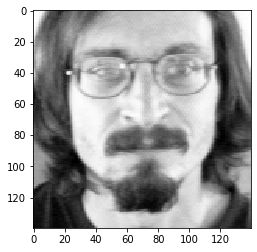

In [76]:
import random
files = os.listdir("D:\\ChromeCoreDownloads\\test")
test = random.sample(files,1)
test_image=cv2.imread("D:\\ChromeCoreDownloads\\test\\"+test[0],cv2.IMREAD_GRAYSCALE)
plt.imshow(test_image,cmap='Greys_r')

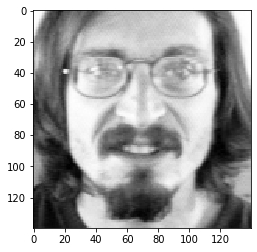

In [77]:
files = os.listdir("D:\\ChromeCoreDownloads\\train")
s=np.dot(test_image.flatten()-norm,featurn_face)
w = np.dot(np.transpose(featurn_face),images)
target = np.argmin(np.linalg.norm(w - s.reshape((30,1)),axis=0))

t=cv2.imread("D:\\ChromeCoreDownloads\\train\\"+files[target],cv2.IMREAD_GRAYSCALE)
plt.imshow(t,cmap='Greys_r')